In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("/Users/sa21/Desktop/Financial-Fraud-Project/data/Raw/PS_20174392719_1491204439457_log.csv")


In [30]:
print(df)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [31]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [32]:
df.shape

(6362620, 11)

In [33]:
col_names = df.columns

col_names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Univariate Exploratory Analysis

<Axes: >

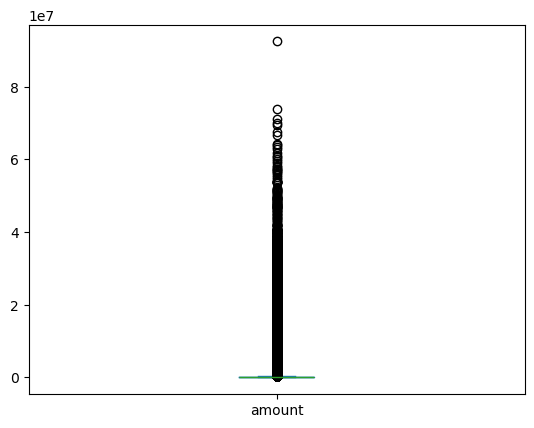

In [35]:
df['amount'].plot.box()

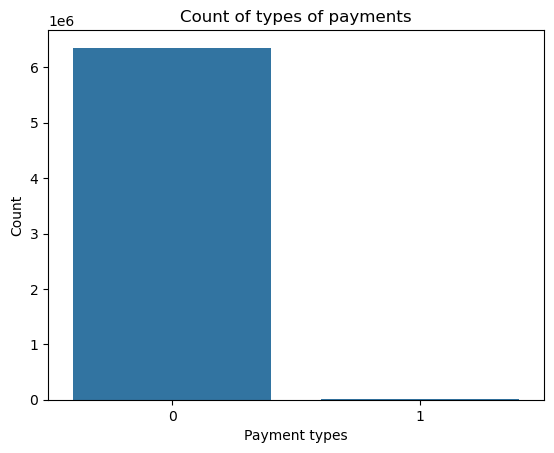

In [36]:
sns.countplot(data=df, x='isFraud')
plt.xlabel('Payment types')
plt.ylabel('Count')
plt.title('Count of types of payments')
plt.show()

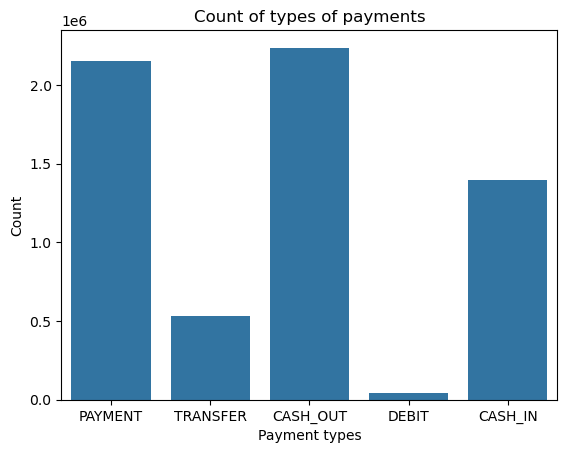

In [37]:
sns.countplot(data=df, x='type')
plt.xlabel('Payment types')
plt.ylabel('Count')
plt.title('Count of types of payments')
plt.show()


In [38]:
col_names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

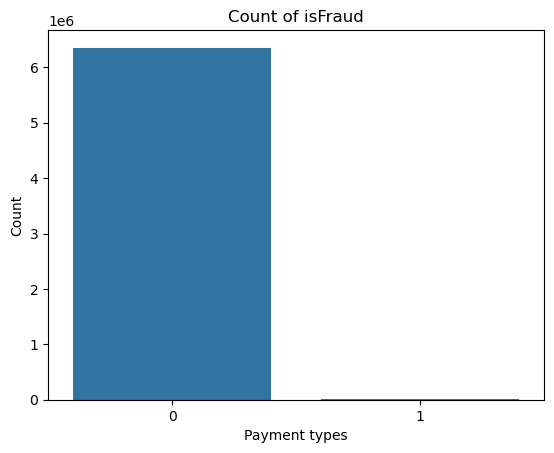

In [39]:
sns.countplot(data=df, x='isFraud')
plt.xlabel('Payment types')
plt.ylabel('Count')
plt.title('Count of isFraud')
plt.show()

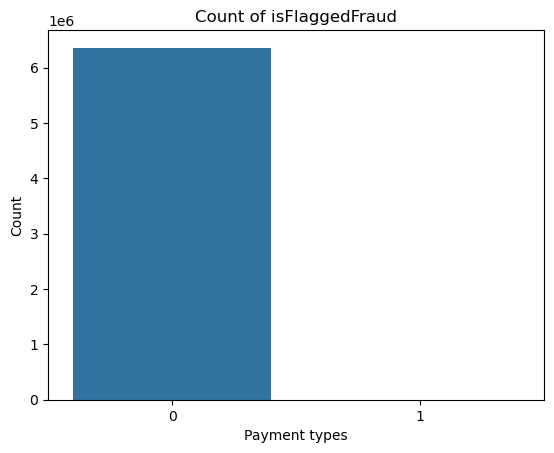

In [40]:
sns.countplot(data=df, x='isFlaggedFraud')
plt.xlabel('Payment types')
plt.ylabel('Count')
plt.title('Count of isFlaggedFraud')
plt.show()

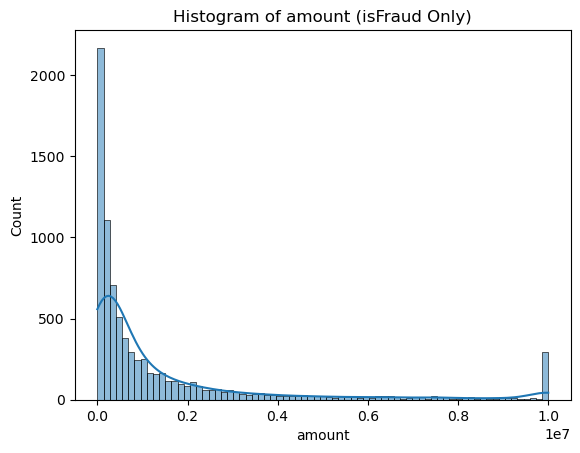

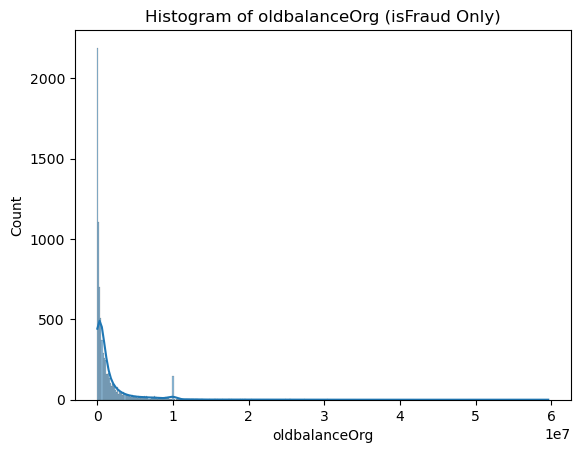

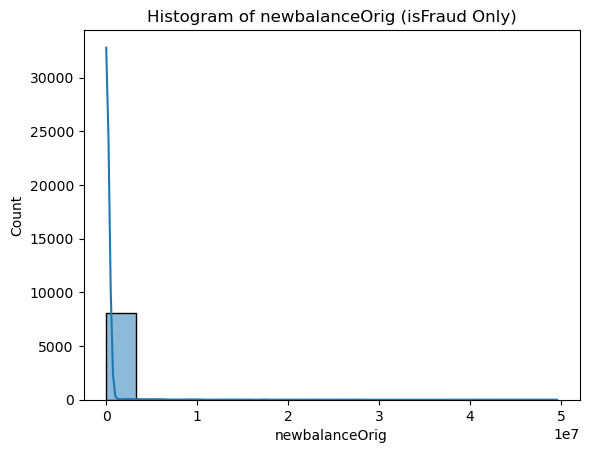

In [41]:
flagged_df = df[df['isFraud'] == 1] 

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Iterate over each feature column and plot histplot for only flagged rows
for feature in features:
    sns.histplot(data=flagged_df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature} (isFraud Only)')
    plt.show()

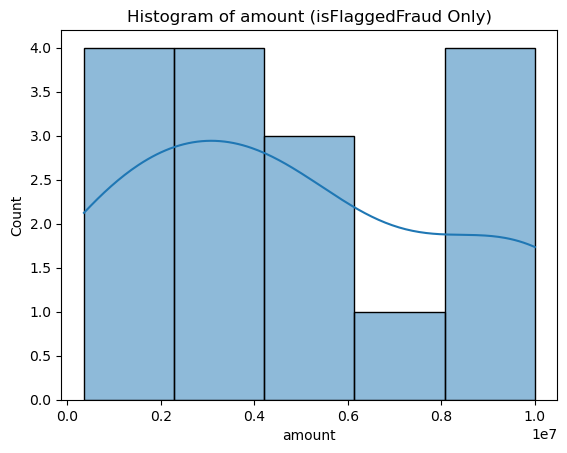

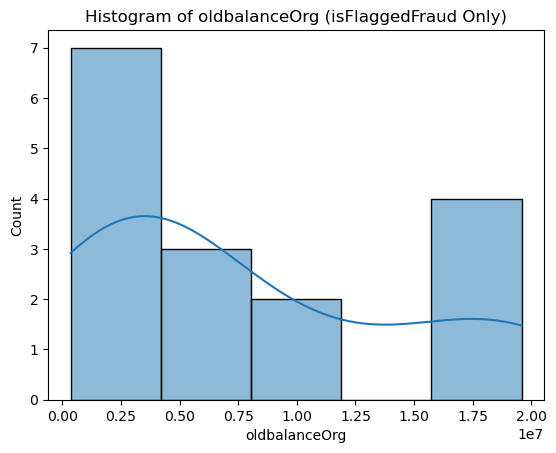

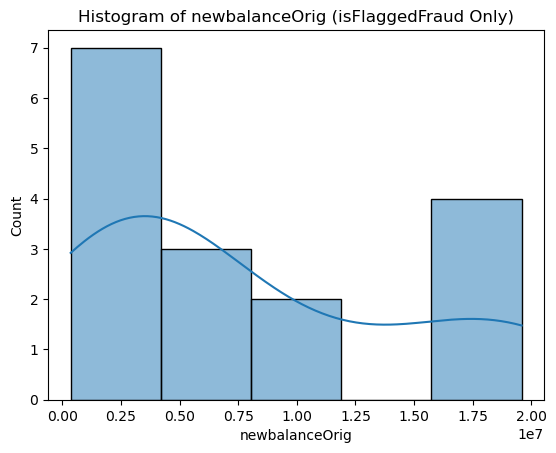

In [42]:
flagged_df = df[df['isFlaggedFraud'] == 1] 

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Iterate over each feature column and plot histplot for only flagged rows
for feature in features:
    sns.histplot(data=flagged_df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature} (isFlaggedFraud Only)')
    plt.show()

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


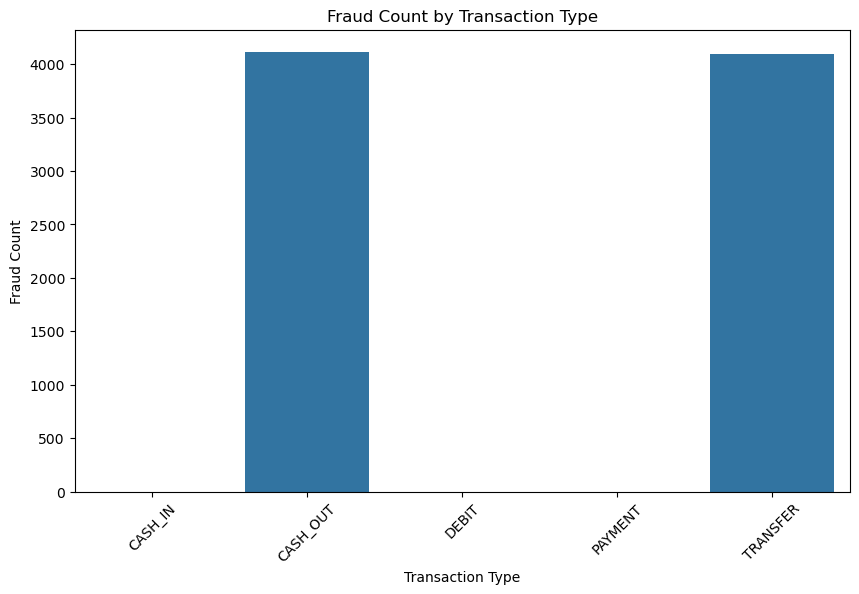

In [45]:
print(df['type'].unique())

# Check how many frauds exist for each transaction type
fraud_by_type = df.groupby('type')['isFraud'].sum()

# Plot a bar plot to show the count of fraud transactions by transaction type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


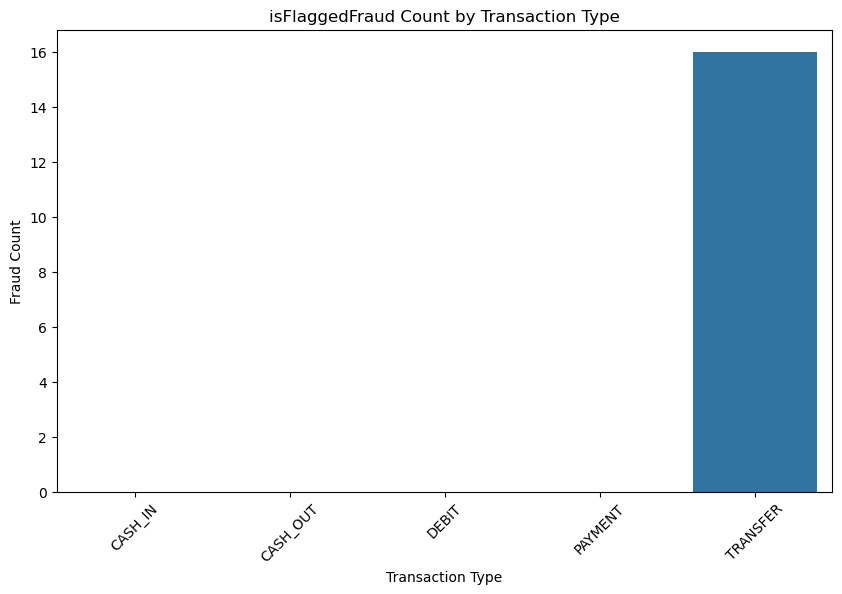

In [46]:
print(df['type'].unique())

# Check how many frauds exist for each transaction type
fraud_by_type = df.groupby('type')['isFlaggedFraud'].sum()

# Plot a bar plot to show the count of fraud transactions by transaction type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.title('isFlaggedFraud Count by Transaction Type')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()

# Bivariate Exploratory Analysis